# Linking MRC and Retrieval

* MRC와 retrieval 을 연결하는 방법

## 1. Introduction to Open-domain Question Answering (ODQA)

* Linking MRC and Retrieval : Open-domain Question Answering (ODQA)
  * MRC : 지문이 주어진 상황에서 질의 응답

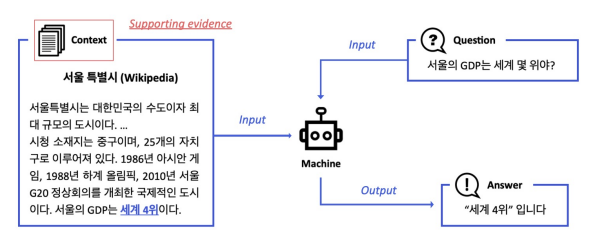

* Linking MRC and Retrieval: Open-domain Question Answering (ODQA)
  * ODQA : 지문이 따로 주어지지 않음. 방대한 World Knowledge에 기반해서 질의응답
    * 영어 위키피디아는 약 300만개의 문서가 있음 -> 문제의 scale이 커짐

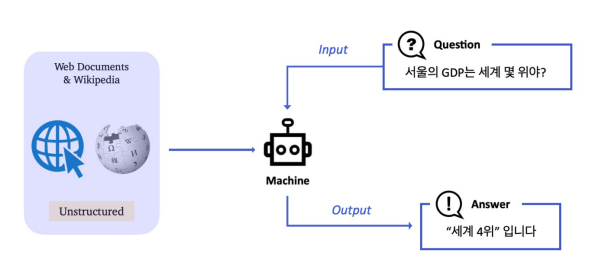

* Linking MRC and Retrieval: Open-domain Question Answering (ODQA)
  * ex) Modern search engines : 연관문서 뿐만 아니라 질문의 답을 같이 제공

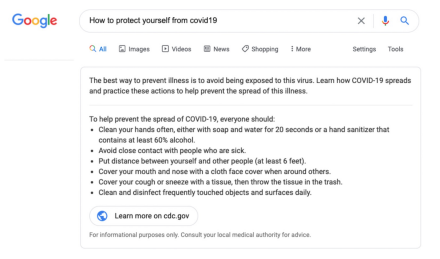

* History of ODQA
  * Text retrieval conference (TREC) - QA Tracks (1999-2007): 연관문서만 반환하는 information retrieval (IR)에서 더 나아가서, short answer with support 형태가 목표

  1. Question processing
    * 어떻게 하면 질문을 잘 이해할 수 있는가
  2. Passage retrieval
  3. Answer processing

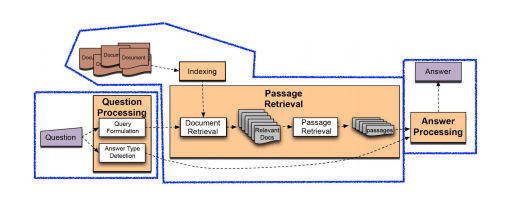

* History of ODQA
  1. Question processing
    * Query formulation: 질문으로부터 키워드를 선택 / Answer type selection (ex. LOCATION: country)

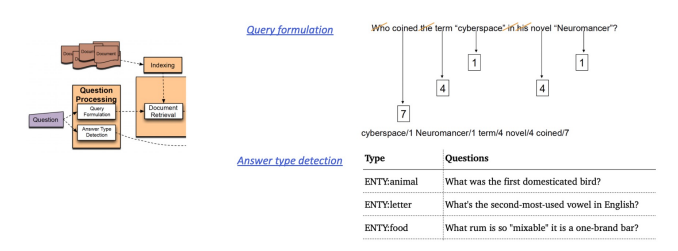

* History of ODQA
  2. Passage retrieval: 기존의 IR 방법을 활용해서 연관된 document를 뽑고, passage 단위로 자른 후 선별 (Named entity / Passage 내 question 단어의 개수 등과 같은 hand-crafted features 활용)
    * 오랫동안 사용되고 있는 방법론

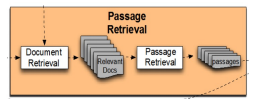

* History of ODQA
  3. Answer processing
    * Hand-crafted features 와 heuristic을 활용한 classifier
    * 주어진 question과 선별된 passage들 내에서 답을 선택함
      * user들의 니즈를 좀 더 파악하게 됨

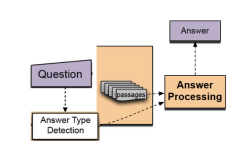

* History of ODQA
  * IBM Watson : 초기 ML model들을 활용하여 만듬

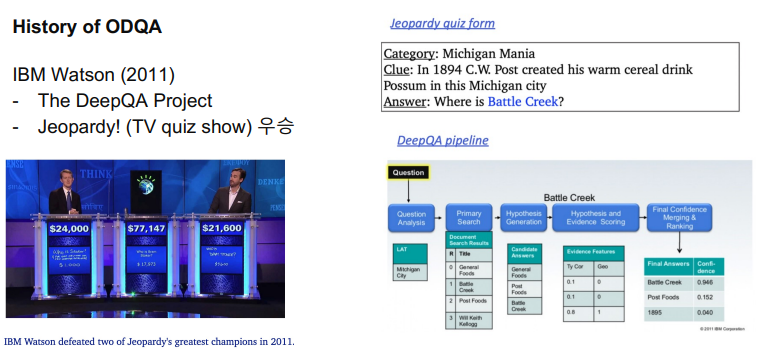

* Recent ODQA Research

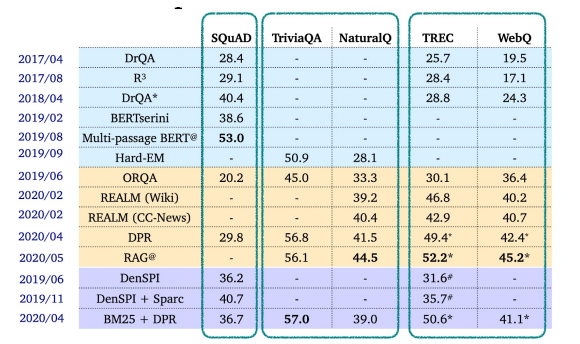

## 2. Retriever-Reader Approach

* Retriever-Reader 접근 방식
  * Retriever : 데이터베이스에서 관련있는 문서를 검색(search)함
    * input
      * 문서셋(Document corpus)
      * 질문(query)
    * output
      * 관련성 높은 문서(document)
  * Reader : 검색된 문서에서 질문에 해당하는 답을 찾아냄    * input
      * Retrieved된 문서(document)
      * 질문(query)
    * output
      * 답변(answer)

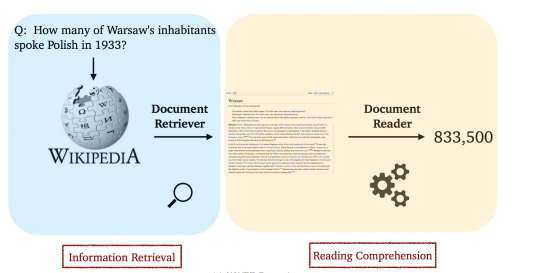

* 학습 단계
  * Retriever
    * TF-IDF, BM25 -> 학습 없음
    * Dense -> 학습 있음

  * Reader
    * SQuAD와 같은 MRC 데이터셋으로 학습
    * 학습 데이터를 추가하기 위해서 Distant supervision 활용

* Distant supervision
  * 질문-답변만 있는 데이터셋 (CuratedTREC, WebQuestions, WikiMovies)에서 MRC 학습 데이터 만들기. Supporting document가 필요함

  1. 위키피디아에서 Retriever를 이용해 관련성 높은 문서를 검색
  2. 너무 짧거나 긴 문서, 질문의 고유명사를 포함하지 않는 등 부적합한 문서 제거
  3. answer가 exact match로 들어있지 않은 문서 제거
  4. 남은 문서 중에 질문과 (사용 단어 기준) 연관성이 가장 높은 단락을 supporting evidence로 사용함

  * 각 데이터셋 별 distant supervision을 적용한 예시

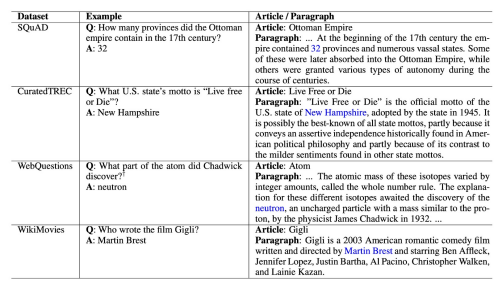

* Inference
  * Retriever가 질문과 가장 관련성 높은 5개 문서 출력
  * Reader는 5개 문서를 읽고 답변 예측
  * Reader가 예측한 답변 중 가장 score가 높은 것을 최종 답으로 사용함

## 3. Issues and Recent Approaches

* Different granularities of text at indexing time
  * 위키피디아에서 각 Passage의 단위를 문서, 단락, 또는 문장으로 정의할지 정해야 함(단위가 정의되어 있지 않음)
    * Article: 5.08 million
    * Paragraph: 29.5 million
    * Sentence: 75.9 million

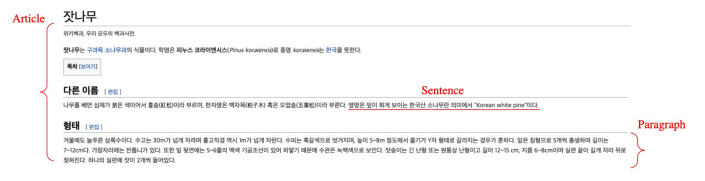

* Different granularities of text at indexing time
  * Retriever 단계에서 몇 개 (top-k)의 문서를 넘길지 정해야함
  * Granularity에 따라 k가 다를 수 밖에 없음(e.g. article -> k=5, paragraph -> k=29, sentence -> k=78)
    * k를 무조건 증가한다고 성능이 좋아지는 것이 아니기 때문에 적절한 tuning이 필요함

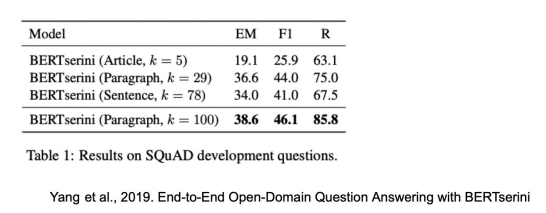

* Single-passage training vs Multi-passage training
  * (Single-passage) : 현재 우리는 k 개의 passage 들을 reader이 각각 확인하고 특정 answer span 에 대한 예측 점수를 나타냄. 그리고 이 중 가장 높은 점수를 가진 answer span을 고르도록 함
  <br> => 이 경우 각 retrieved passage 들에 대한 직접적인 비교라고 볼 수 없음
  <br> => 따로 reader 모델이 보는 게 아니라 전체를 한번에 보면 어떨까?
  * (Multi-passage) : retrieved passages 전체를 하나의 passage로 취급하고, reader 모델이 그 안에서 answer span 하나를 찾도록 함
    * <U>Cons</U> : 문서가 너무 길어지므로 GPU에 더 많은 메모리를 할당해야함 & 처리해야하는 연산량이 많아짐

* Importance of each passage
  * Retriever 모델에서 추출된 top-k passage 들의 retrieval score를 reader 모델에 전달
    * score 정보가 없으면 top-k passage들의 ranking 정보가 없어 차이 없는 reader 입장에서는 동일한 passage가 됨
    * 최종 answer를 ranking 할 때, passage score를 reader score에 넣어줌으로써 더 성능이 잘나올 수 있음

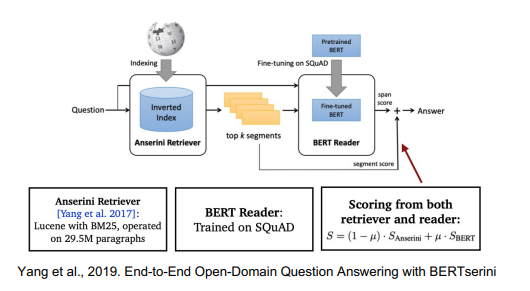